vision全部載せ①

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
iVBORw0KGgoAAAANSUhEUgAAAwAAAAMDCAIAAACad+V3AAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOR9dVxUzff/BRYQJKQ7FBCWpbtbQEpEsRUDsDuwOxELsaVDaZAQBBVESenu7u5l2fj9cR/us59dWBZY0Of7e7/ui9fuzJkzc5c7c8+cOUEFAwA5eXmEjExaampLSwsAAEJCQg579jAyMmLR6KqIcFoGxlVWVlRUVMB/HM1NTVFRUe1tbeBXNjY2ZRUVfQMDGhqaReqxsaHh69ev/X196+3sVomJ4VeN9XRXhobyq6uzrV5dHRnJIiIipKe/SMP4y/EjNbWwoGCvo+Py5ctnosGi0ZWhIQycXP3VVSLGxuySUhQcAGZy8nNwcFV1tbnkan51jRWrVgF/zdNeHRU5WF/Po6QspP9/6vGojYulZ2YR1NMjhxiNRt+9devilSswGIyg6kdq6u+cHAZGRqblyxmXL2diYmJiYmJkZFy+fDk9PX1sbCwcDjcyNl7gaH+kpjY1Nu7YtYu4qtjbC4OaUNh/cE4M+/v6Xr18OTIyAgDAqlWrdu/dC4PBenp6vL28+vv6AACgpaXduWuXuITEAkeOj6LCwsqKCvvNm4mrRtvbqyIj6JiYVoiJC2hrQ+VoNPrhgwcHDx9esWLFwgeQmJBARUVlamY2KyUOh4v59Kmrq2ufo+OcXj1IJLK8rKyurq6jo6O3pweJROLXMjMz8/Dy8vLy8vDwrBITY2NjI+Yw2tFRFREu77yfmuhhg9BTWtqWkS7n6ET+wKYFDovtLS9rz84GcDheFZW+yqrRrs6Vm7f4+ft3dnYCAKCkrLzR3p58ht1FRa3pvxC7HDATE2V

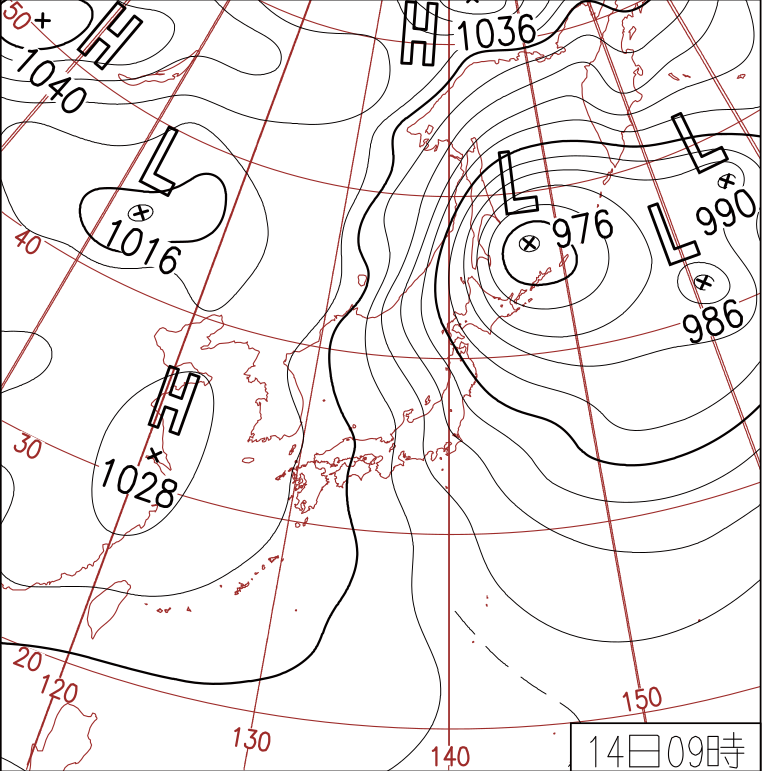


```
以下は2022年1月14日の気象データです。
ファイルが読み込めませんでした。
```

入力された画像は2022年1月14日9時の天気図です。

#命令文
入力された天気図の画像と、気象データをもとに、以下の処理を、step-by-stepで処理をしてください。
stepは全部で11個あります。必ず最後まで処理を行なってください。
確認作業のstepでは、1つ前のstepが本当に正しいかの確認を行なってください。
日本語を出力してください。

#処理
1. 画像内の気圧の大きさと位置をすべて正確に特定してください。画像内の前線の種類と位置を正確に特定してください。日本の位置は、画像の中心である、縦横ちょうど真ん中だと定義します。エリアを5分割し、日本の北(画像上部、中心より上)、日本の南（画像下部、中心より下）、日本の東（画像右部、中心よりも右）、日本の西（画像左部、中心よりも左）、日本上空（画像中央、中心）と定義して、それぞれの気圧の位置を文章で箇条書きで出力してください。

2. step1の確認作業、気圧の大きさと位置を入力した画像を確認して確かめてください。前線の種類と位置を入力した画像を確認して確かめてください。気圧の数値がわからない場合も、もう一度入力した画像を確認して出力しなおしてください。間違っていた場合は、正しいものを出力し直してください。

3. 気圧と前線の位置関係から、どのような気圧配置かを分析してください。

4. 気圧の位置と気圧配置から、気圧の影響が日本の主要地域（北海道、東北、関東、中部、近畿、中国・四国、九州、沖縄）にどのような影響を与えているか、また今後予想される影響について具体的に分析してください。

5. step4の確認作業、step4で生成された文章が本当に正しいのかを、前述している気象データをもとに確認してください。気象データでは、各地方、各県の気象データがあります。それをもとにstep4の文章の気象が正しいのかを判定してください。気象データは正確なデータなので、もしstep4の文章が気象データと整合性が取れない場合、気象データの情報を参考にして、間違っている情報の部分を訂正して、文章を再生成してください。

6. 気象データの数値から、各地方（北海道、東北、関東、中部、近畿、中国・四国、九州、沖縄）の天気概

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
import requests
from datetime import datetime
import base64
import json
import re
from IPython.display import Image, display
import base64
from io import BytesIO

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    print(encoded_image)
    # Base64エンコードされたデータをデコードし、バイト列に変換
    image_data = base64.b64decode(encoded_image)
    # バイト列から画像を生成
    image = Image(data=image_data)
    # 画像を表示
    display(image)
    return encoded_image

image_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/再生成コメントファイル_v2 3/20220114.png"
base64_image = encode_image(image_path)

match = re.search(r'(\d{4})(\d{2})(\d{2})\.png$', image_path)
if match:
    year, month, day = match.groups()
    year, month, day = int(year), int(month), int(day)
    date = f"{int(year)}年{int(month)}月{int(day)}日"
    formatted_date_int = f"{year}-{month}-{day}"
else:
    print("画像ファイル名から日付を解析できませんでした。")

weather_date = date
formatted_date = f"{year}-{month}-{day}"

# ファイルを読み込むための関数
def read_file(file_path):
    try:
        with open(file_path, "r") as file:
            return file.read()
    except IOError:
        return "ファイルが読み込めませんでした。"

weather_date = date

# weather_data 変数に気象データのファイル内容を格納
weather_data_file_path = f"/content/drive/My Drive/研究用/2023_12_調査ノート/気象数値データ/{formatted_date_int}.txt"
weather_data = read_file(weather_data_file_path)

# instruction 変数にインストラクションのファイル内容を格納
instruction_file_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/プロンプト文/gpt/v4_instruction.txt"
instruction = read_file(instruction_file_path)

text = f"""
```
以下は{weather_date}の気象データです。
{weather_data}
```

入力された画像は{weather_date}9時の天気図です。

{instruction}

絶対に、出力するのは最後のステップで作成したコメントのみにしてください.
"""

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4.1-2025-04-14",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"{text}"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}",
            "detail": "high"
          }
        }
      ]
    }
  ],
  "max_tokens": 30000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(text)

if response.status_code == 200:
    print(response)
    formatted_response = json.dumps(response.json(), indent=4, ensure_ascii=False)
    print(formatted_response)
    result = response.json()["choices"][0]["message"]["content"]
    print(result)
else:
    print(f"APIリクエストに失敗しました: ステータスコード {response.status_code}")